In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/users-of-a-social-network-who-bought-an-suv/Social_Network_Ads.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

df = pd.read_csv('/kaggle/input/users-of-a-social-network-who-bought-an-suv/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,16804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


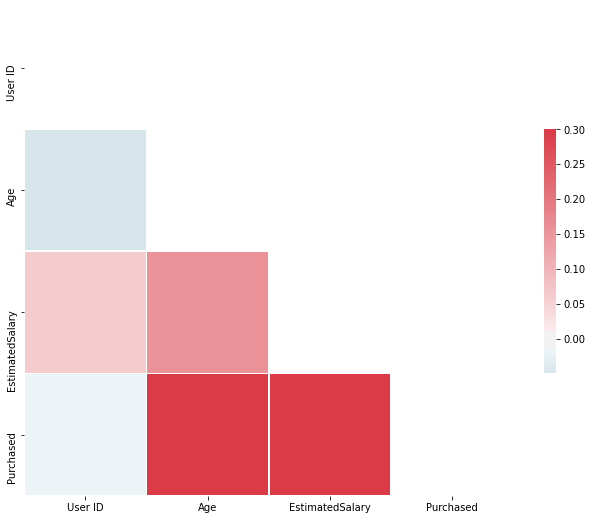

In [3]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [4]:
#defining our features and target variable
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set - 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Feature scaling as range of estimated salary and age is different
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
#Classifying and prediction
classifier = LogisticRegression(random_state = 0)  #Logistic classifier
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = classifier.predict(X_test)  #predicting test results

In [7]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm, '\n')

tp, fp, fn, tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print("Recall: ", tp/(tp+fn))
print("Precision: ", tp/(tp+fp))
print("Accuracy: ", (tp+tn)/(tp+tn+fp+fn))

[[57  1]
 [ 5 17]] 

Recall:  0.9193548387096774
Precision:  0.9827586206896551
Accuracy:  0.925
